## matplotlibによる可視化

plt.subplots()や.add_subplot()を用いてAxes オブジェクトを作成し、グラフを作成します。複数グラフを同時に描画したり、二軸グラフを作成する場合、細かいレイアウトを調整したいときに利用できます。

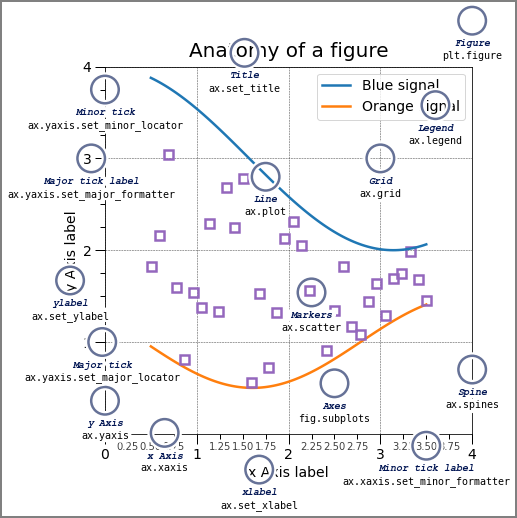

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

royal_blue = [0, 20/256, 82/256]


# make the figure

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_axes([0.2, 0.17, 0.68, 0.7], aspect=1)

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter("{x:.2f}")

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0, length=10, labelsize=14)
ax.tick_params(which='minor', width=1.0, length=5, labelsize=10,
               labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal", zorder=10)
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal")
ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9,
        marker='s', markerfacecolor='none', markeredgecolor='C4',
        markeredgewidth=2.5)

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("x Axis label", fontsize=14)
ax.set_ylabel("y Axis label", fontsize=14)
ax.legend(loc="upper right", fontsize=14)


# Annotate the figure

def annotate(x, y, text, code):
    # Circle marker
    c = Circle((x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5,
               edgecolor=royal_blue + [0.6], facecolor='none',
               path_effects=[withStroke(linewidth=7, foreground='white')])
    ax.add_artist(c)

    # use path_effects as a background for the texts
    # draw the path_effects and the colored text separately so that the
    # path_effects cannot clip other texts
    for path_effects in [[withStroke(linewidth=7, foreground='white')], []]:
        color = 'white' if path_effects else royal_blue
        ax.text(x, y-0.2, text, zorder=100,
                ha='center', va='top', weight='bold', color=color,
                style='italic', fontfamily='Courier New',
                path_effects=path_effects)

        color = 'white' if path_effects else 'black'
        ax.text(x, y-0.33, code, zorder=100,
                ha='center', va='top', weight='normal', color=color,
                fontfamily='monospace', fontsize='medium',
                path_effects=path_effects)


annotate(3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter")
annotate(-0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
annotate(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
annotate(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
annotate(1.52, 4.15, "Title", "ax.set_title")
annotate(1.75, 2.80, "Line", "ax.plot")
annotate(2.25, 1.54, "Markers", "ax.scatter")
annotate(3.00, 3.00, "Grid", "ax.grid")
annotate(3.60, 3.58, "Legend", "ax.legend")
annotate(2.5, 0.55, "Axes", "fig.subplots")
annotate(4, 4.5, "Figure", "plt.figure")
annotate(0.65, 0.01, "x Axis", "ax.xaxis")
annotate(0, 0.36, "y Axis", "ax.yaxis")
annotate(4.0, 0.7, "Spine", "ax.spines")

# frame around figure
fig.patch.set(linewidth=4, edgecolor='0.5')
plt.show()

## plt.subplots()

FigureとAxesを同時に作成する方法です。引数はsubplots(行数, 列数) のようになっています。

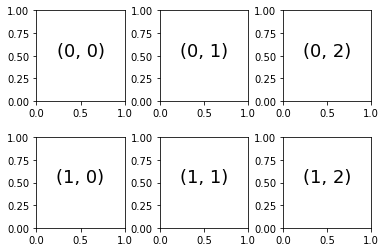

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(2, 3, figsize=(6, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(2):
    for j in range(3):
        # axesにはarray形式で複数のAxesが格納されている.
        # index指定でアクセス可能
        axes[i][j].text(0.5, 0.5, str((i, j)),
           fontsize=18, ha='center')

plt.show()

## fig.add_subplot()

plt.figure()でFigureを作成してからAxesを追加する方法です。引数がadd_subplot(行数, 列数, 図番号) になっており、以下の図の様に左上から順番に図番号が振られています。

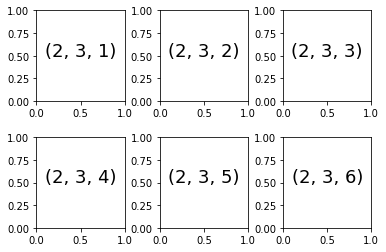

In [7]:
fig = plt.figure(figsize=(6, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')
plt.show()

## 時系列データの描画

データを読み込みます。

In [1]:
import numpy as np
import pandas

fname = '../data/2020413.csv'
df = pandas.read_csv(fname, index_col=0, parse_dates=True, na_values=['None'], encoding='shift-jis')

matplotlib本体ではなく、その下のpyplotを呼び出します。横軸が時刻、縦軸がデータの一列目の図を出してみましょう。

pandas では、 iloc[行数, 列数] で Dataframe からデータを抽出することができます。

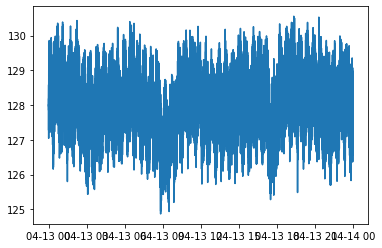

In [2]:
import matplotlib.pyplot as plt

x = df.index        # x軸: 時刻
y = df.iloc[:, 0]   # データの一列目. 「:」で行すべて選択、「0」で1列目を選択

fig = plt.figure()  # figure オブジェクトの作成
ax = fig.add_subplot(1, 1, 1)   # Axesオブジェクトの作成
ax.plot(x, y)
plt.show()

上で示したMatplolibの公式チュートリアルの図のように、Axesオブジェクトは軸や目盛りを持っているため、それぞれにアクセスすることで細かい調整が可能となります。ここでは、図の解像度や色、日本語フォントの埋め込み、時系列データに頻出な時刻目盛りなどを調整します。

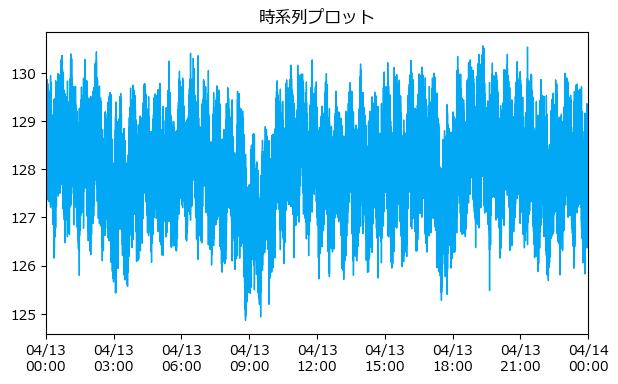

In [4]:
# matplotlibで日付のフォーマットを取り扱うモジュールを追加で読み込む
from matplotlib.dates import DateFormatter

# matplotlibでは日本語にデフォルトで対応していないので、日本語対応フォントを読み込む
# 使えるフォント一覧は以下のコードで取得できます。
# import matplotlib.font_manager
# [f.name for f in matplotlib.font_manager.fontManager.ttflist]
plt.rcParams['font.family'] = 'Meiryo'
# plt.rcParams['font.family'] = 'BIZ UDGothic'
# plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro' 

# figureの引数; figsizeで画像のサイズ、dpiで解像度を設定できます。
fig = plt.figure(figsize=(7, 4), dpi=100)
ax = fig.add_subplot(1, 1, 1)

# 線の色や、太さを指定
ax.plot(x, y, color='#02A8F3', linewidth=1.0)

# x軸(xaxis)にアクセスしてフォーマットを調整
ax.xaxis.set_major_formatter(DateFormatter('%m/%d\n%H:%M')) #日付を2段組に

# プロットをグラフの限界まで広げる（余計な空白を作らない）
ax.set_xlim(x[0], x[-1])

# タイトルをつける
ax.set_title('時系列プロット')

plt.show()

再利用可能とするため、グラフのプロットをまとめる関数を作成します。

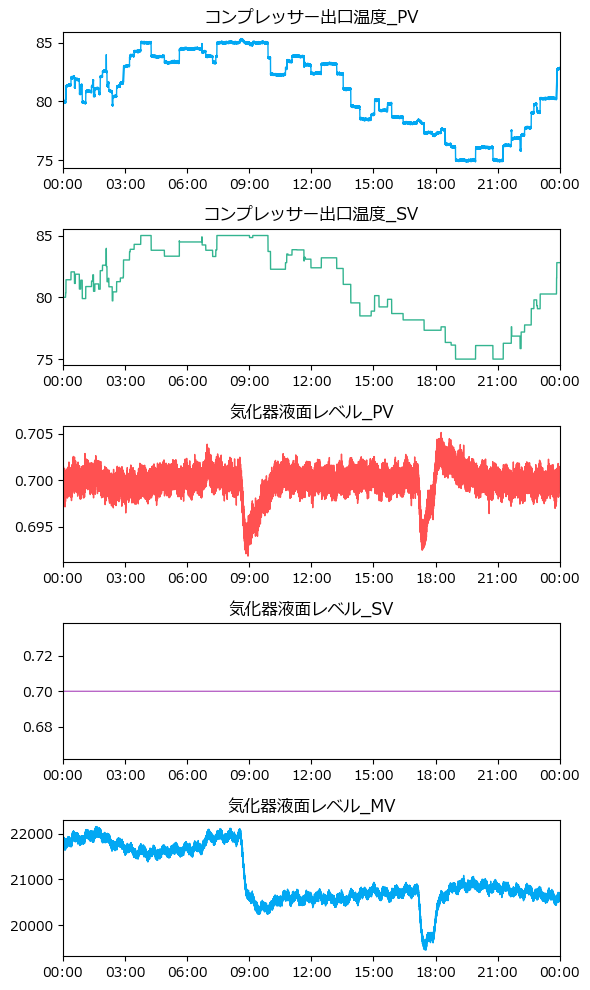

In [5]:
import itertools


def plot_figs(df):
    '''
    うけとったデータをすべてプロットする関数
    :param df: plotしたいpandas.Dataframe
    :return: 
    '''
    color_iter = itertools.cycle(['#02A8F3', '#33B490', '#FF5151', '#B967C7'])
    n_figs = df.columns.size
    fig = plt.figure(figsize=(6, 2.0*n_figs), dpi=100)
    x = df.index
    for i in range(n_figs):
        y = df.iloc[:, i]
        title = df.columns[i]
        ax = fig.add_subplot(n_figs, 1, i+1)
        ax.plot(x, y, color=next(color_iter), linewidth=1.0)
        ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
        ax.set_xlim(x[0], x[-1])
        ax.set_title(title, fontsize=12)
    fig.tight_layout()
    plt.show()
    plt.close()

# 全部をプロットする余白がないので、ここでは一部をプロット
plot_list = ['コンプレッサー出口温度_PV', 'コンプレッサー出口温度_SV',
             '気化器液面レベル_PV', '気化器液面レベル_SV', '気化器液面レベル_MV']
plot_figs(df.loc[:, plot_list])

まとめて可視化してみると、これだけでもさまざまな特徴に気づくことができます。例えば、

- コンプレッサー出口温度_SV は目標値（SV）なので、出力値（PV） コンプレッサー出口温度_PV が追従して動いている

- 気化器液面レベル_PV は8時30分ごろと17時ごろの挙動に変化がある

  - 目標値（SV）である 気化器液面レベル_SV は変化していないが、操作量（MV）である 気化器液面レベル_MV は変化していることから、同時刻に他の目標値（SV）が変更され、その影響を吸収するために操作が行われたことが推察される

などがわかります。データ分析をする際はどのようなデータに対しても可視化は必要不可欠です。